In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import os
%matplotlib inline

In [29]:
imm = pd.read_excel('IMM_2020.xls', sheet_name=1, dtype={'CVE_MUN': 'category'})

# Muestra las primeras filas del DataFrame
imm.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,01001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,01002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,01003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,01004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,01005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


In [30]:
indicadores = imm[['ANALF', 'SBASC', 'OVSDE','OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']]
indicadores.head()

,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
0,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594
1,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471
2,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777
3,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369
4,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753


In [32]:
print(imm.describe())

           CVE_ENT       POB_TOT        ANALF        SBASC        OVSDE  \
count  2469.000000  2.469000e+03  2469.000000  2469.000000  2469.000000   
mean     19.215472  5.103849e+04    10.164466    45.853026     3.159963   
std       7.367340  1.469907e+05     7.633633    13.981594     5.289299   
min       1.000000  8.100000e+01     0.353446     5.535137     0.000000   
25%      14.000000  4.489000e+03     4.427755    35.737568     0.651869   
50%      20.000000  1.355200e+04     8.202762    46.339439     1.428250   
75%      24.000000  3.528400e+04    13.787294    55.856378     3.342618   
max      32.000000  1.922523e+06    53.071253    88.328076    64.450424   

             OVSEE        OVSAE         OVPT         VHAC      PL.5000  \
count  2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean      1.500793     6.118145     7.987232    26.566286    69.900469   
std       2.769167     9.245995     8.973591    10.586540    35.267726   
min       0.000000     0.000

In [31]:
X = StandardScaler().fit_transform(indicadores)
cov_x = np.cov(X.T)
vals, vecs = np.linalg.eig(cov_x)
idx = vals.argsort()[::-1]
eigvals = vals[idx]
eigvecs = vecs[:,idx]

In [32]:
 dat = {'PC':range(1,10),'std':np.sqrt(eigvals), 'var_prop':eigvals/sum(eigvals),
'cum_prop':np.cumsum(eigvals/sum(eigvals))}
stds = pd.DataFrame(data = dat)
stds

,PC,std,var_prop,cum_prop
0,1,2.104043,0.491689,0.491689
1,2,1.133920,0.142806,0.634495
2,3,0.916967,0.093388,0.727883
3,4,0.862860,0.082692,0.810575
4,5,0.752737,0.062932,0.873506
5,6,0.631369,0.044274,0.917780
6,7,0.570875,0.036196,0.953976
7,8,0.497175,0.027454,0.981430
8,9,0.408899,0.018570,1.000000


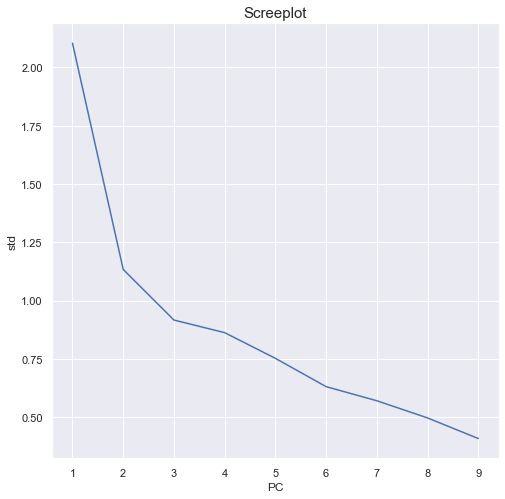

In [33]:
 plt.figure(figsize=(8, 8))
sns.lineplot(x="PC", y="std", data=stds)
plt.title('Screeplot', fontsize=15)
plt.show()


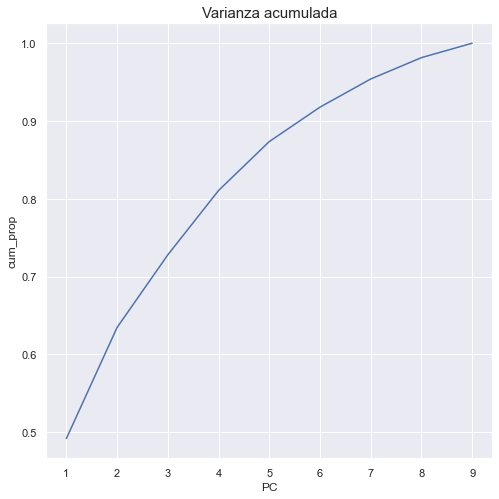

In [34]:
 plt.figure(figsize=(8, 8))
sns.lineplot(x="PC", y="cum_prop", data=stds)
plt.title('Varianza acumulada', fontsize=15)
plt.show()


In [35]:
 # componentes
comps = pd.DataFrame(data=eigvecs.T, columns=indicadores.columns,
index=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9' ])
print(comps.T)


              pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
ANALF   -0.411104 -0.108659 -0.093362 -0.183637 -0.005263 -0.551280  0.093652   
SBASC   -0.394736 -0.291060  0.111403  0.019709 -0.069394 -0.505365 -0.178865   
OVSDE   -0.237374  0.509972  0.499260 -0.170189  0.505338 -0.083915  0.184955   
OVSEE   -0.265188  0.561235  0.226750  0.167457 -0.469933  0.091366 -0.451798   
OVSAE   -0.238413  0.277631 -0.578108  0.624842  0.365806 -0.056789  0.028145   
OVPT    -0.371528  0.118576 -0.273067 -0.140136 -0.535142  0.170185  0.390192   
VHAC    -0.363212  0.021881 -0.247235 -0.501820  0.230906  0.411993  0.111150   
PL.5000 -0.295071 -0.331886  0.455509  0.496940 -0.048234  0.287226  0.452082   
PO2SM   -0.366936 -0.355886  0.028442  0.006630  0.207650  0.375342 -0.592564   

              pc8       pc9  
ANALF    0.193382  0.653179  
SBASC   -0.009322 -0.674076  
OVSDE   -0.327640 -0.037319  
OVSEE    0.315203  0.050731  
OVSAE    0.000852 -0.060100  
OVPT    -

In [36]:
 from sklearn.decomposition import PCA
pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(X)
dat = {'PC':range(1,10),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_,
'cum_prop':np.cumsum(pca.explained_variance_ratio_)}
stds = pd.DataFrame(data = dat)
stds

,PC,std,var_prop,cum_prop
0,1,2.104043,0.491689,0.491689
1,2,1.133920,0.142806,0.634495
2,3,0.916967,0.093388,0.727883
3,4,0.862860,0.082692,0.810575
4,5,0.752737,0.062932,0.873506
5,6,0.631369,0.044274,0.917780
6,7,0.570875,0.036196,0.953976
7,8,0.497175,0.027454,0.981430
8,9,0.408899,0.018570,1.000000


In [37]:
comps = pd.DataFrame(data=pca.components_.T,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'],
index=indicadores.columns)
print(comps)


              pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
ANALF    0.411104 -0.108659 -0.093362 -0.183637  0.005263  0.551280 -0.093652   
SBASC    0.394736 -0.291060  0.111403  0.019709  0.069394  0.505365  0.178865   
OVSDE    0.237374  0.509972  0.499260 -0.170189 -0.505338  0.083915 -0.184955   
OVSEE    0.265188  0.561235  0.226750  0.167457  0.469933 -0.091366  0.451798   
OVSAE    0.238413  0.277631 -0.578108  0.624842 -0.365806  0.056789 -0.028145   
OVPT     0.371528  0.118576 -0.273067 -0.140136  0.535142 -0.170185 -0.390192   
VHAC     0.363212  0.021881 -0.247235 -0.501820 -0.230906 -0.411993 -0.111150   
PL.5000  0.295071 -0.331886  0.455509  0.496940  0.048234 -0.287226 -0.452082   
PO2SM    0.366936 -0.355886  0.028442  0.006630 -0.207650 -0.375342  0.592564   

              pc8       pc9  
ANALF   -0.193382 -0.653179  
SBASC    0.009322  0.674076  
OVSDE    0.327640  0.037319  
OVSEE   -0.315203 -0.050731  
OVSAE   -0.000852  0.060100  
OVPT     

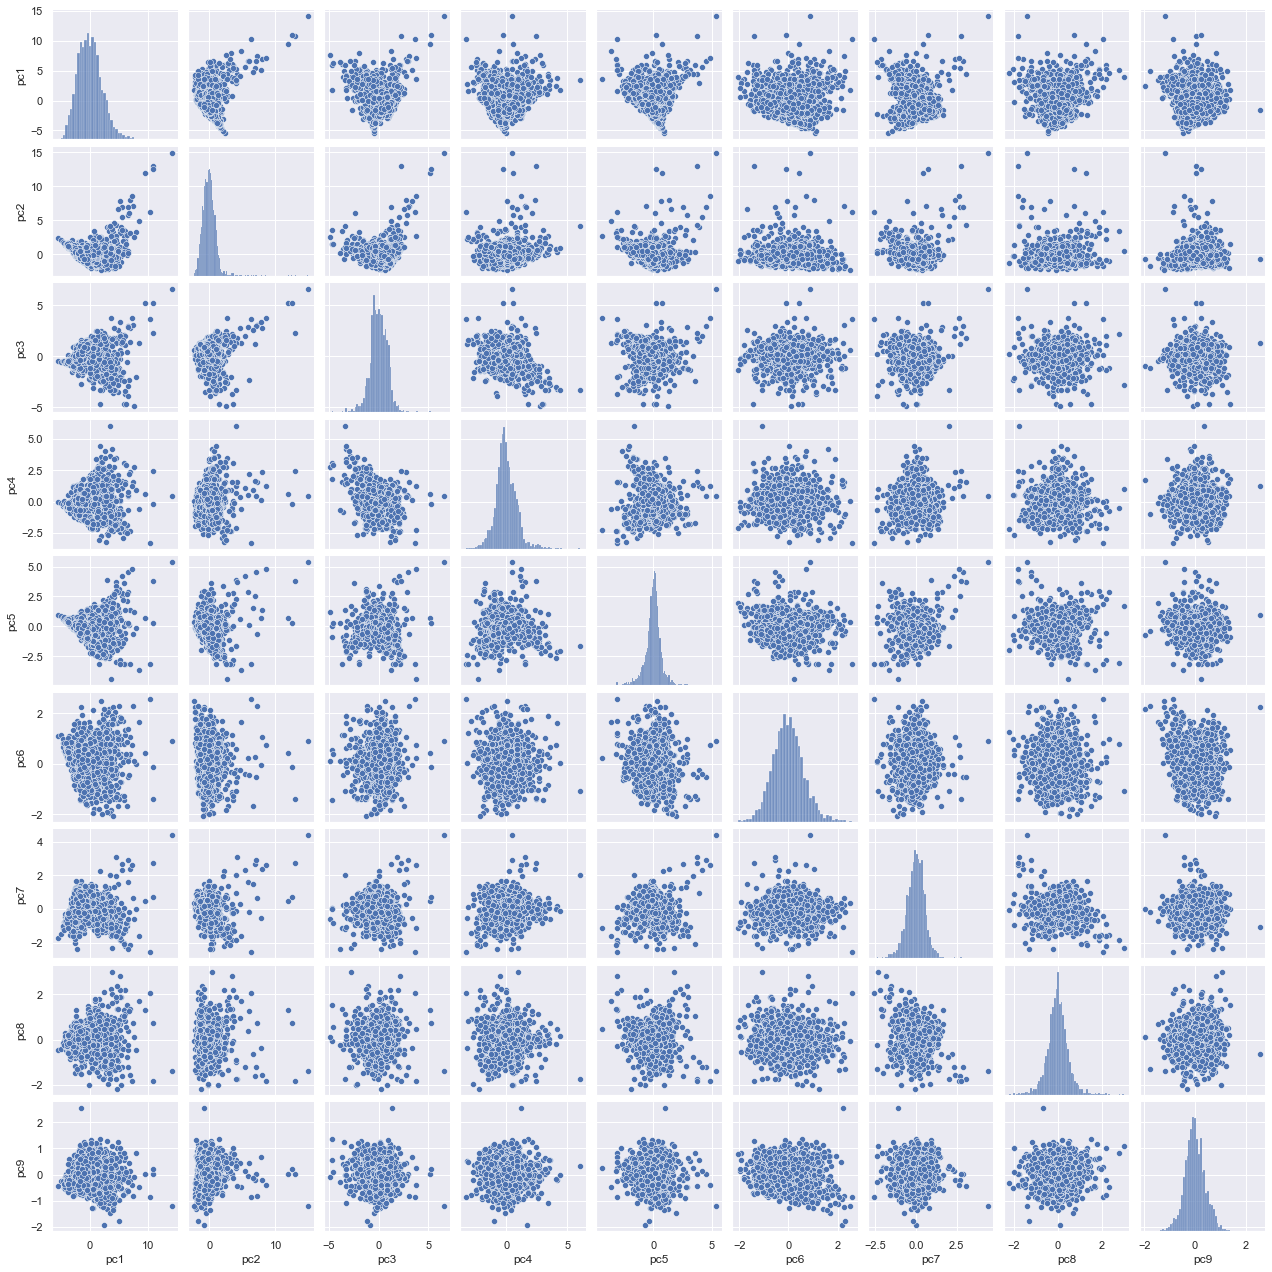

In [38]:
# proyectar datos
proj = pd.DataFrame(pca.transform(X),columns =['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
sns.set()
sns.pairplot(proj, height=2);

In [39]:
import plotly.express as px
import pandas as pd
pca_dataset = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'city':indicadores.index})
fig = px.scatter(pca_dataset, x='pc1', y='pc2', hover_data=['city'])
fig.update_layout(
autosize=False,
width=600,
height=600,
)
fig.show()

In [42]:
# Obtener las cargas del primer componente principal
PC1 = comps['pc1']

#IM alternativo
IM_alternativo = np.dot(imm[['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']].values, PC1)

# Normalizar [0, 1]
IM_alternativo = (IM_alternativo - np.min(IM_alternativo)) / (np.max(IM_alternativo) - np.min(IM_alternativo))
imm['IM_alternativo'] = IM_alternativo
imm.head()


,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo
0,1,Aguascalientes,01001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508,0.119792
1,1,Aguascalientes,01002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433,0.360301
2,1,Aguascalientes,01003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453,0.326050
3,1,Aguascalientes,01004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326,0.326210
4,1,Aguascalientes,01005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042,0.207475


In [45]:
data_IMM_PCA_T10 = imm.sort_values(by=['IMN_2020'], ascending=False).copy()
data_IMM_PCA_T10.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo
285,9,Ciudad de México,09014,Benito Juárez,434153,0.353446,5.535137,0.007413,0.010425,0.020387,0.068141,3.950392,0.000000,28.453113,62.397145,Muy bajo,0.977052,0.000000
976,19,Nuevo León,19019,San Pedro Garza García,132169,1.015566,11.659507,0.003942,0.033893,0.037049,0.305738,6.202640,0.031021,32.817872,61.845548,Muy bajo,0.968415,0.030166
1003,19,Nuevo León,19046,San Nicolás de los Garza,412199,0.957916,15.005994,0.004859,0.017977,0.021136,0.480435,6.701794,0.000000,41.147158,61.418383,Muy bajo,0.961726,0.056670
286,9,Ciudad de México,09015,Cuauhtémoc,545884,0.952548,13.528740,0.054147,0.029113,0.108849,0.122046,9.417070,0.000000,41.394890,61.328534,Muy bajo,0.960319,0.058950
963,19,Nuevo León,19006,Apodaca,656464,0.736270,11.873313,0.002763,0.014276,0.051578,0.334830,10.754394,2.701748,40.892191,61.315874,Muy bajo,0.960121,0.061294
287,9,Ciudad de México,09016,Miguel Hidalgo,414470,0.752806,11.036677,0.054909,0.018221,0.077069,0.184729,8.838854,0.000000,47.573580,61.221458,Muy bajo,0.958643,0.064758
224,8,Chihuahua,08019,Chihuahua,937674,1.017294,16.414407,0.103270,0.093713,0.861081,0.521494,8.458509,1.270378,42.117343,61.124135,Muy bajo,0.957119,0.069441
683,15,México,15020,Coacalco de Berriozábal,293444,0.735520,14.181563,0.019129,0.025259,0.082314,0.330314,6.586452,0.067815,55.236972,60.947422,Muy bajo,0.954352,0.083825
1801,22,Querétaro,22006,Corregidora,212567,1.676293,14.257050,0.078530,0.127254,1.132536,1.251928,7.375860,12.925807,41.263220,60.917041,Muy bajo,0.953876,0.083847
274,9,Ciudad de México,09003,Coyoacán,614447,1.104531,12.986324,0.046466,0.016688,0.073952,0.249053,9.760754,0.000000,52.845710,60.876953,Muy bajo,0.953248,0.083289


In [47]:
data_IMM_PCA_T10 = imm.sort_values(by=['IM_alternativo'], ascending=True).copy()
data_IMM_PCA_T10.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo
285,9,Ciudad de México,09014,Benito Juárez,434153,0.353446,5.535137,0.007413,0.010425,0.020387,0.068141,3.950392,0.000000,28.453113,62.397145,Muy bajo,0.977052,0.000000
976,19,Nuevo León,19019,San Pedro Garza García,132169,1.015566,11.659507,0.003942,0.033893,0.037049,0.305738,6.202640,0.031021,32.817872,61.845548,Muy bajo,0.968415,0.030166
1003,19,Nuevo León,19046,San Nicolás de los Garza,412199,0.957916,15.005994,0.004859,0.017977,0.021136,0.480435,6.701794,0.000000,41.147158,61.418383,Muy bajo,0.961726,0.056670
286,9,Ciudad de México,09015,Cuauhtémoc,545884,0.952548,13.528740,0.054147,0.029113,0.108849,0.122046,9.417070,0.000000,41.394890,61.328534,Muy bajo,0.960319,0.058950
963,19,Nuevo León,19006,Apodaca,656464,0.736270,11.873313,0.002763,0.014276,0.051578,0.334830,10.754394,2.701748,40.892191,61.315874,Muy bajo,0.960121,0.061294
287,9,Ciudad de México,09016,Miguel Hidalgo,414470,0.752806,11.036677,0.054909,0.018221,0.077069,0.184729,8.838854,0.000000,47.573580,61.221458,Muy bajo,0.958643,0.064758
224,8,Chihuahua,08019,Chihuahua,937674,1.017294,16.414407,0.103270,0.093713,0.861081,0.521494,8.458509,1.270378,42.117343,61.124135,Muy bajo,0.957119,0.069441
1358,20,Oaxaca,20350,San Sebastián Tutla,16878,1.107148,12.891960,0.047458,0.053390,0.931364,2.859346,8.597015,0.331793,50.124187,60.778107,Muy bajo,0.951701,0.082275
274,9,Ciudad de México,09003,Coyoacán,614447,1.104531,12.986324,0.046466,0.016688,0.073952,0.249053,9.760754,0.000000,52.845710,60.876953,Muy bajo,0.953248,0.083289
996,19,Nuevo León,19039,Monterrey,1142994,1.550621,18.763627,0.048355,0.034536,0.215460,0.759219,11.148125,0.003675,44.188480,60.865686,Muy bajo,0.953072,0.083409


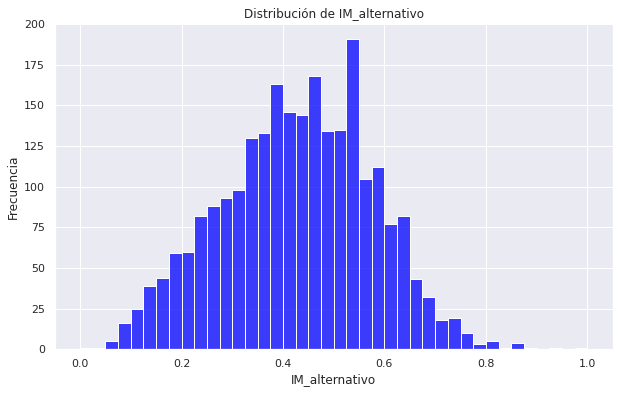

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.histplot(imm['IM_alternativo'], bins=40, color='blue')
plt.title('Distribución de IM_alternativo')
plt.xlabel('IM_alternativo')
plt.ylabel('Frecuencia')
plt.show()

In [48]:
# Obtener las cargas del primer componente principal
PC2 = comps['pc2']

#IM alternativo
IM_alternativo_2 = np.dot(imm[['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']].values, PC2)

# Normalizar [0, 1]
IM_alternativo_2 = (IM_alternativo_2 - np.min(IM_alternativo_2)) / (np.max(IM_alternativo_2) - np.min(IM_alternativo_2))
imm['IM_alternativo_2'] = IM_alternativo_2

imm.head()


,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo,IM_alternativo_2
0,1,Aguascalientes,01001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508,0.119792,0.803602
1,1,Aguascalientes,01002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433,0.360301,0.375478
2,1,Aguascalientes,01003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453,0.326050,0.435497
3,1,Aguascalientes,01004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326,0.326210,0.424464
4,1,Aguascalientes,01005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042,0.207475,0.652659


In [49]:
# Obtener las cargas del primer componente principal
PC3 = comps['pc3']

#IM alternativo
IM_alternativo_3 = np.dot(imm[['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']].values, PC3)

# Normalizar [0, 1]
IM_alternativo_3 = (IM_alternativo_3 - np.min(IM_alternativo_3)) / (np.max(IM_alternativo_3) - np.min(IM_alternativo_3))
imm['IM_alternativo_3'] = IM_alternativo_3

imm.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo,IM_alternativo_2,IM_alternativo_3
0,1,Aguascalientes,01001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508,0.119792,0.803602,0.419437
1,1,Aguascalientes,01002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433,0.360301,0.375478,0.760262
2,1,Aguascalientes,01003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453,0.326050,0.435497,0.638004
3,1,Aguascalientes,01004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326,0.326210,0.424464,0.684998
4,1,Aguascalientes,01005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042,0.207475,0.652659,0.551312


In [50]:
data_IMM_PCA_T10 = imm.sort_values(by=['IM_alternativo_2'], ascending=True).copy()
data_IMM_PCA_T10.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo,IM_alternativo_2,IM_alternativo_3
1284,20,Oaxaca,20276,San Miguel Santa Flor,691,42.424242,81.250000,1.449275,2.028986,1.014493,14.347826,37.155964,100.0,98.134328,47.241864,Muy alto,0.739742,0.698262,0.000000,0.810526
1267,20,Oaxaca,20259,San Miguel Ahuehuetitlán,2142,34.599729,81.750339,2.946679,0.420954,1.870907,10.617399,34.030418,100.0,96.226415,48.892398,Alto,0.765587,0.662943,0.012142,0.836221
1505,20,Oaxaca,20497,Santiago Yaitepec,4233,43.529412,82.058824,2.301851,0.783104,0.545800,15.475908,50.105484,100.0,92.862871,46.852452,Muy alto,0.733644,0.719788,0.019281,0.775801
1536,20,Oaxaca,20528,Santos Reyes Tepejillo,904,33.677991,73.559823,0.331858,0.221239,0.774336,5.752212,16.376307,100.0,93.571429,50.961336,Alto,0.797984,0.583475,0.021086,0.879641
1498,20,Oaxaca,20490,Santiago Texcalcingo,2974,27.390438,72.559761,0.403497,0.470746,0.806994,8.238063,40.551182,100.0,98.850575,50.223708,Alto,0.786433,0.634094,0.022396,0.816166
2117,30,Veracruz de Ignacio de la Llave,30025,Ayahualulco,27217,29.248989,74.628658,0.875032,1.279459,0.830913,8.474576,42.215988,100.0,96.992381,49.622293,Alto,0.777016,0.645218,0.030176,0.815451
1397,20,Oaxaca,20389,Santa Inés Yatzeche,908,29.506008,73.831776,0.000000,0.330396,0.000000,15.969163,21.212122,100.0,95.047619,50.626797,Alto,0.792745,0.608064,0.031621,0.845359
198,7,Chiapas,07118,San Andrés Duraznal,6047,29.413440,73.917995,1.306433,0.959153,0.661485,7.623615,50.800915,100.0,96.868476,49.319822,Alto,0.772280,0.659795,0.034089,0.796829
1442,20,Oaxaca,20434,Santa María Teopoxco,3985,31.491499,71.058733,0.928482,0.476788,1.279799,15.633626,30.373001,100.0,96.840149,49.701458,Alto,0.778256,0.632043,0.044429,0.814885
1265,20,Oaxaca,20257,San Melchor Betaza,1052,23.756219,76.368159,2.186312,1.045627,0.190114,15.019011,28.181818,100.0,96.250000,50.522897,Alto,0.791118,0.619694,0.044961,0.851047


In [51]:
data_IMM_PCA_T10 = imm.sort_values(by=['IM_alternativo_'], ascending=True).copy()
data_IMM_PCA_T10.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IM_alternativo,IM_alternativo_2,IM_alternativo_3
1111,20,Oaxaca,20103,San Antonino Castillo Velasco,6064,8.344400,58.919876,0.978117,0.298408,53.166446,27.536472,30.690536,4.287599,84.932369,49.869512,Alto,0.780887,0.458278,0.766646,0.000000
392,12,Guerrero,12019,Copalillo,15598,26.945344,69.059266,21.049235,2.600503,68.852036,32.922501,50.330555,49.596102,92.420293,40.472510,Muy alto,0.633743,0.724395,0.695131,0.164032
105,7,Chiapas,07024,Chanal,13678,22.384463,59.339569,2.893017,2.577282,34.393127,25.971070,63.203663,30.304138,97.775629,46.437884,Muy alto,0.727153,0.609438,0.550686,0.166954
763,15,México,15100,Tezoyuca,47044,2.331890,27.914073,0.072645,0.100404,30.338255,4.091055,26.629852,5.875351,70.871028,55.859361,Bajo,0.874680,0.254145,0.821318,0.186881
145,7,Chiapas,07064,Oxchuc,54932,15.989953,52.870649,4.343619,10.438196,70.051123,41.197736,53.728092,81.147601,95.985634,40.834056,Muy alto,0.639404,0.738457,0.588046,0.199588
1573,20,Oaxaca,20565,Villa de Zaachila,46464,5.701768,36.058917,0.523345,3.191972,36.662269,25.803940,26.846495,29.627238,73.041169,51.880614,Alto,0.812378,0.387075,0.757694,0.216305
1033,20,Oaxaca,20025,Chahuites,11356,10.920719,51.188896,1.949663,0.558313,23.670684,5.680610,30.946527,2.659387,80.408086,53.692440,Medio,0.840749,0.349017,0.691516,0.229418
434,12,Guerrero,12061,Tixtla de Guerrero,43171,11.514780,36.068894,4.272985,0.420984,30.678018,17.983020,32.390793,27.634292,75.730386,52.095926,Alto,0.815750,0.390712,0.719702,0.259946
1179,20,Oaxaca,20171,San José Tenango,18102,32.652366,70.226517,1.538031,9.910515,67.432886,52.583893,50.879372,100.000000,96.145503,37.956038,Muy alto,0.594339,0.860413,0.408845,0.269476
936,17,Morelos,17035,Xoxocotla,27805,8.227160,34.556318,0.911557,0.466630,10.956773,27.144149,30.161751,13.422046,84.179671,54.072650,Medio,0.846702,0.356386,0.674483,0.277929


In [47]:
imm.to_excel('IMMalternativo.xlsx', index=False)

In [57]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

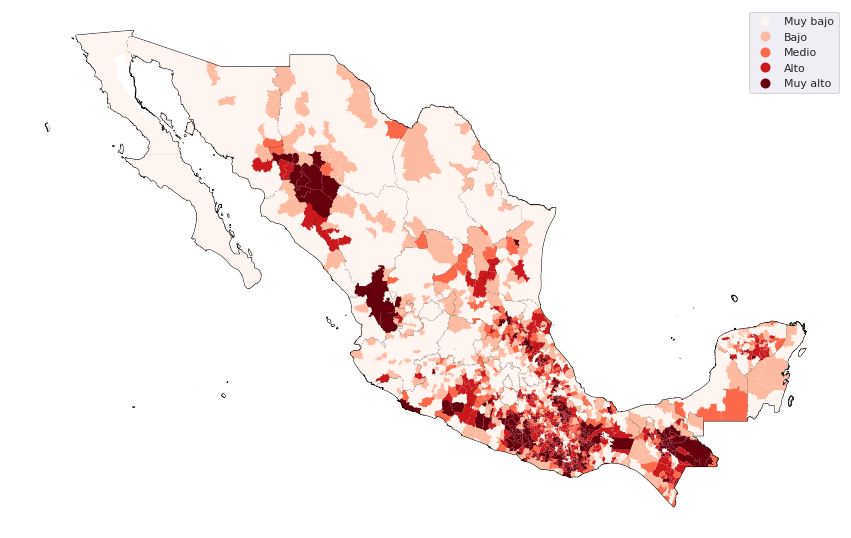

In [77]:
data_dir = 'C:\\Users\\nmari\\Documents\\Ciencia de datos\\Tarea 2'

# Lee la cartografía de entidades y municipios de México
fileindex = os.path.join(data_dir, 'national\\national\\national_estatal.shp')
base = gpd.read_file(fileindex)

# Lee la cartografía de municipios y corrige el sistema de coordenadas de referencia
fileindex = os.path.join(data_dir, 'mg2021_integrado_tarea\\mg2021_integrado_tarea\\conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex, index_col='CVEGEO')
layer = layer.to_crs("EPSG:4326")

# Datos del índice de marginación
fileindex = os.path.join(data_dir, 'IMMalternativo.xlsx')
# Especifica el tipo de variable string para los códigos de entidades y municipios
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x: 'str' for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex, sheet_name='IMM2020', dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')

# Une la información cartográfica y del índice de marginación
layer_marg = layer.merge(marg_municipal, left_on='CVEGEO', right_on='CVE_MUN')

# Definir intervalos para categorías
bins = [0, 0.4, 0.475, 0.525, 0.6 , 1.0]

# Crear las categorías
categories = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

# Agregar una nueva columna con las categorías
layer_marg['IM_categories'] = pd.cut(layer_marg['IM_alternativo'], bins=bins, labels=categories, include_lowest=True)

# Grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# Mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# Mapa de los municipios con su índice de marginación (categorías)
layer_marg.plot(column='IM_categories', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds")
# Elimina los ejes
ax.set_axis_off()
plt.show()



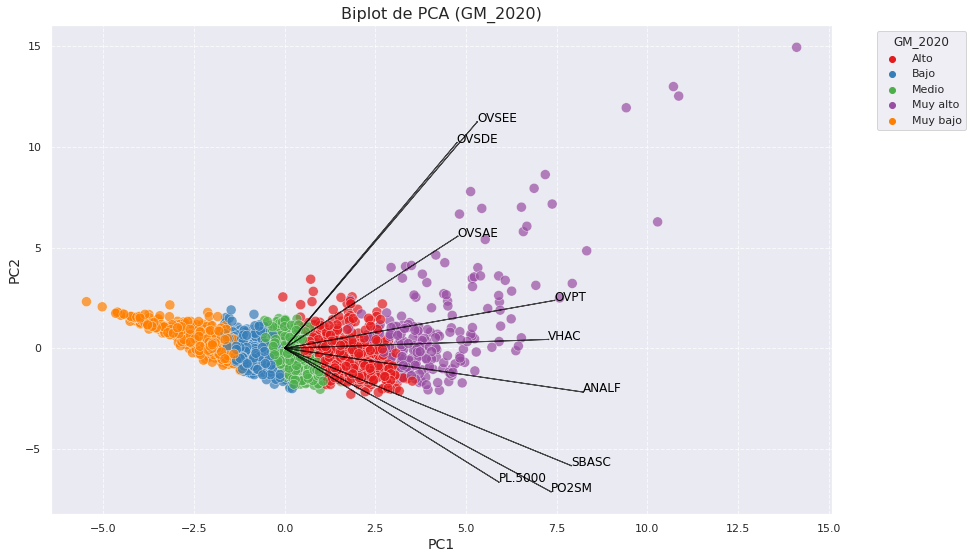

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

imm = pd.read_excel('IMM_2020.xls', sheet_name=1, dtype={'CVE_MUN': 'category'})
features = ['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM']
X = imm[features].values
X_std = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Añadir la columna de grupos al DataFrame
imm['GM_2020'] = imm['GM_2020'].astype('category')

# Gráfico de dispersión y flechas de carga
plt.figure(figsize=(14, 9))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=imm['GM_2020'], palette='Set1', s=100, edgecolor='w', linewidth=0.5, alpha=0.7)
ldngs = pca.components_
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i]*20, ldngs[1, i]*20, head_width=0.03, head_length=0.03, color='black', alpha=0.7)
    plt.text(ldngs[0, i] * 20, ldngs[1, i] * 20, feature, fontsize=12, color='black')

# Etiquetas y título
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('Biplot de PCA (GM_2020)', fontsize=16)
plt.legend(title='GM_2020', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
